<a href="https://colab.research.google.com/github/kaisarfardin6620/Lung-Cancer-Prediction-using-Machine-Learning./blob/main/Lung_cancer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/survey lung cancer.csv')

In [ ]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [ ]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [ ]:
df.tail()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES
308,M,62,1,1,1,2,1,2,2,2,2,1,1,2,1,YES


In [ ]:
df.shape

(309, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [ ]:
df.isnull().sum()

,0
GENDER,0
AGE,0
SMOKING,0
YELLOW_FINGERS,0
ANXIETY,0
PEER_PRESSURE,0
CHRONIC DISEASE,0
FATIGUE,0
ALLERGY,0
WHEEZING,0


In [ ]:
df.duplicated().sum()

33

In [ ]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [ ]:
df.describe(include='object')

,GENDER,LUNG_CANCER
count,309,309
unique,2,2
top,M,YES
freq,162,270


In [ ]:
df['GENDER'].value_counts()

,count
GENDER,
M,162
F,147


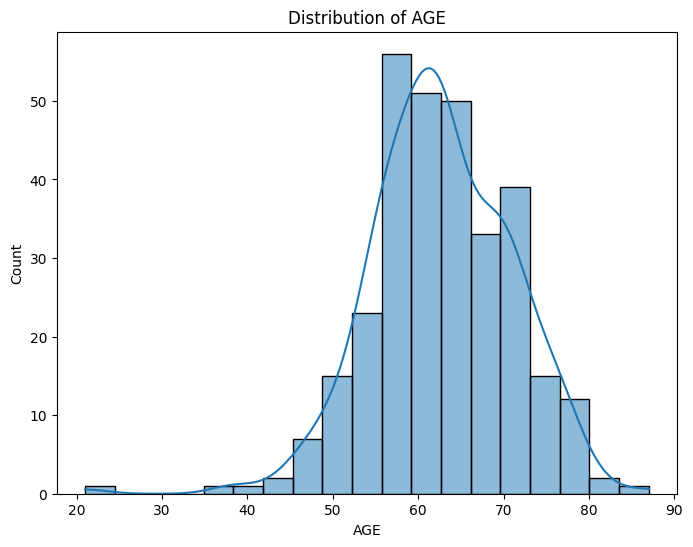

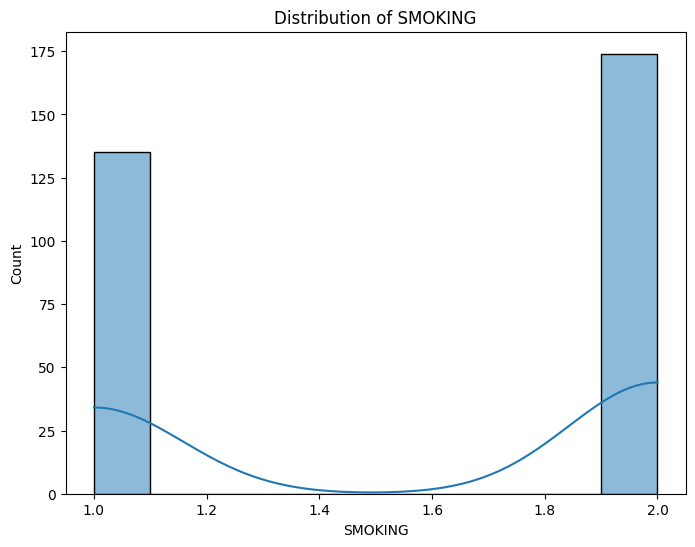

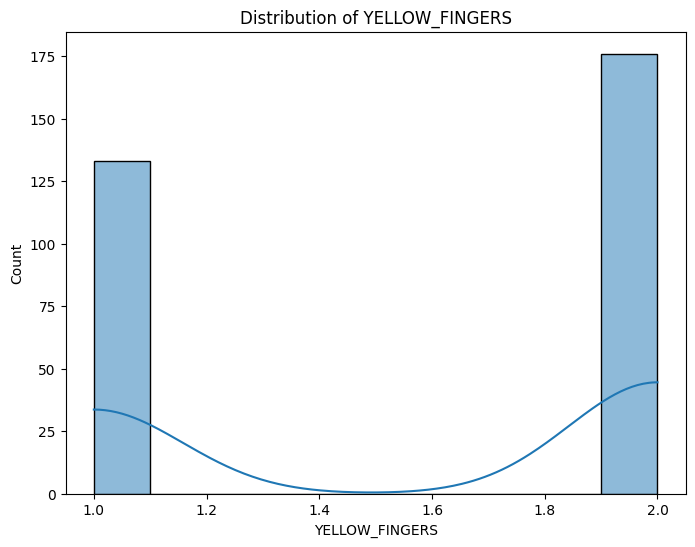

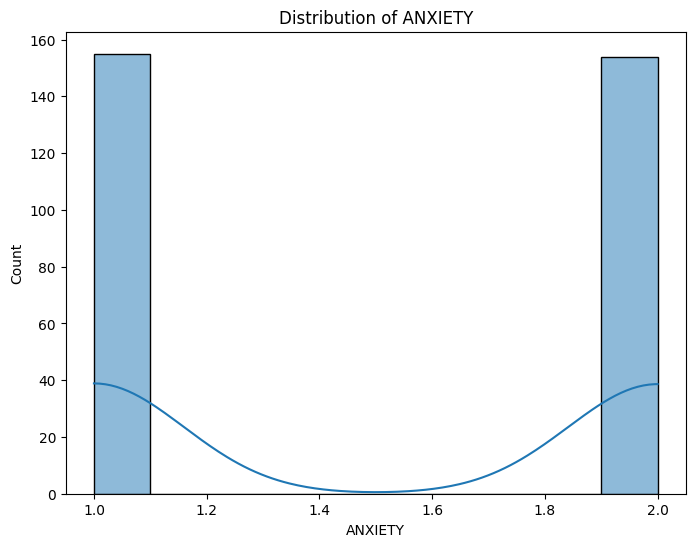

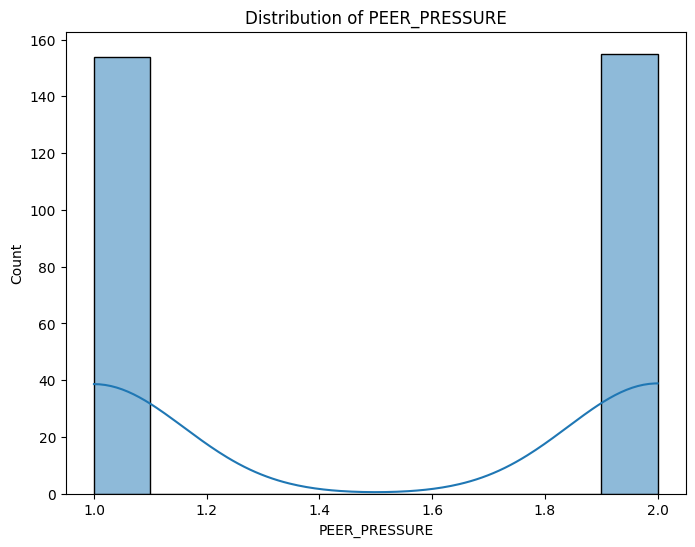

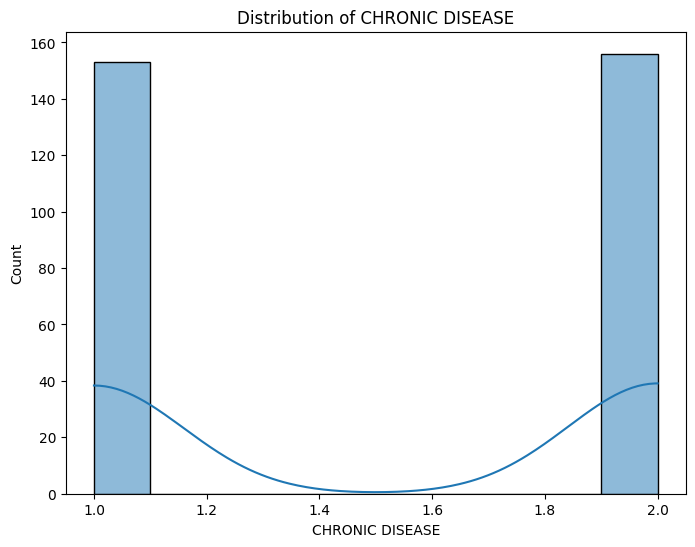

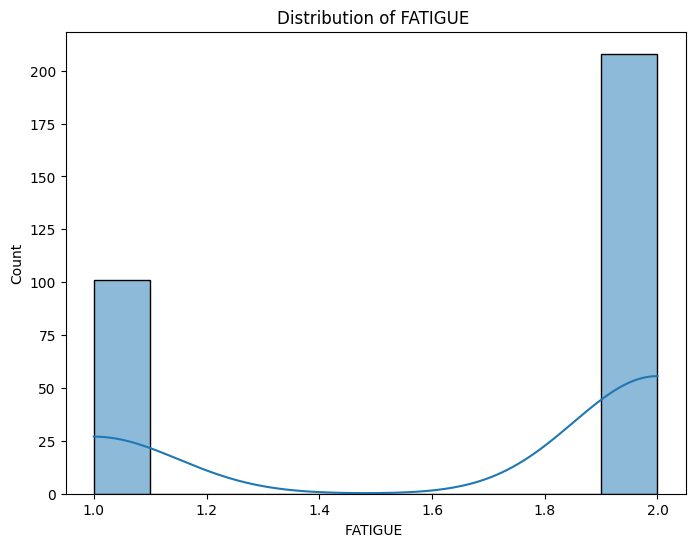

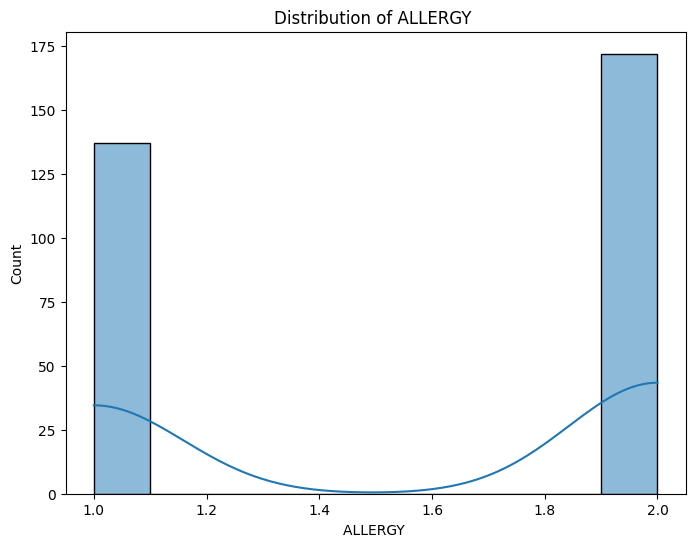

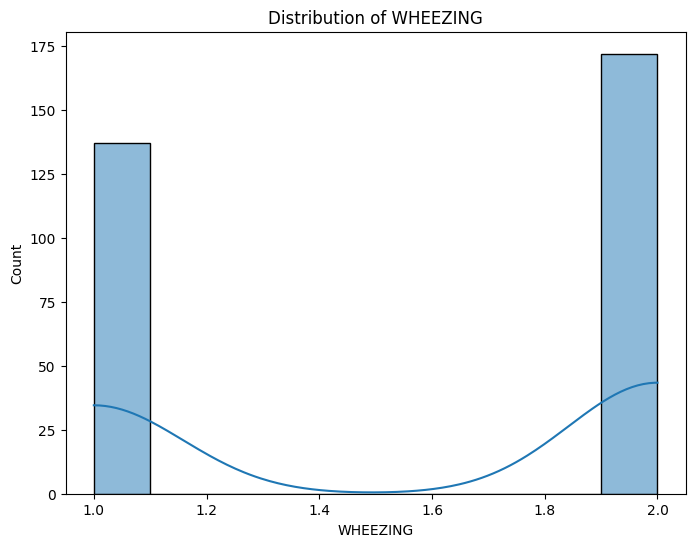

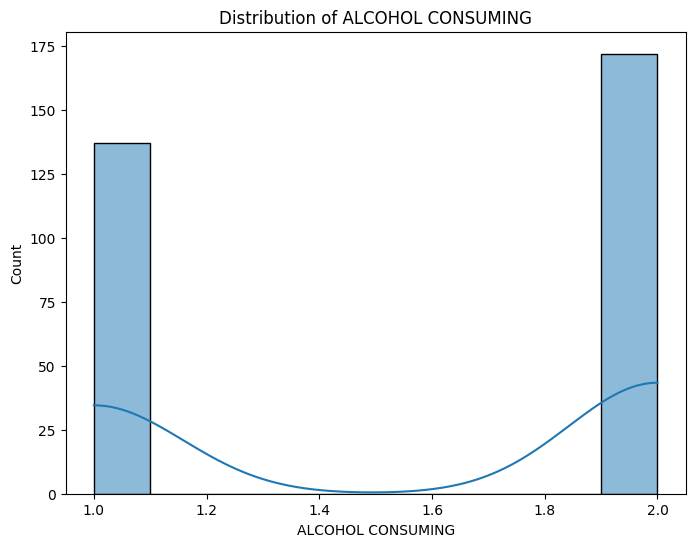

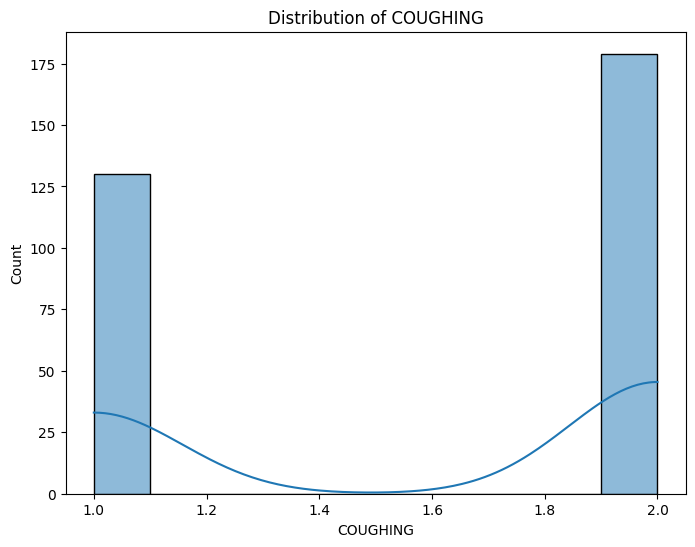

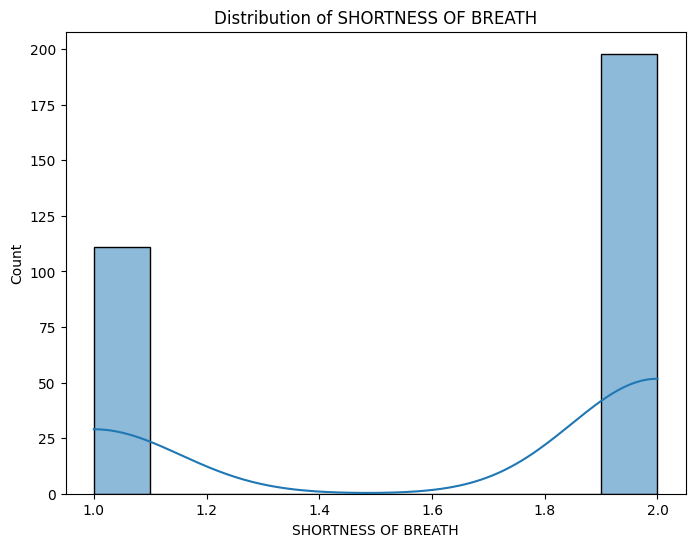

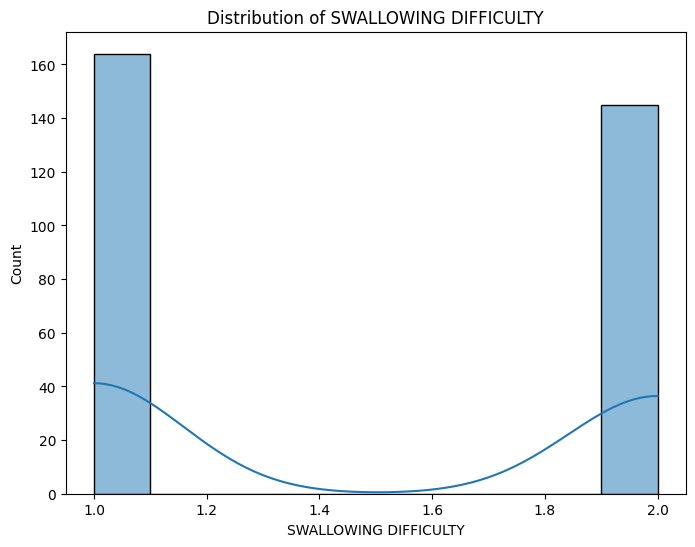

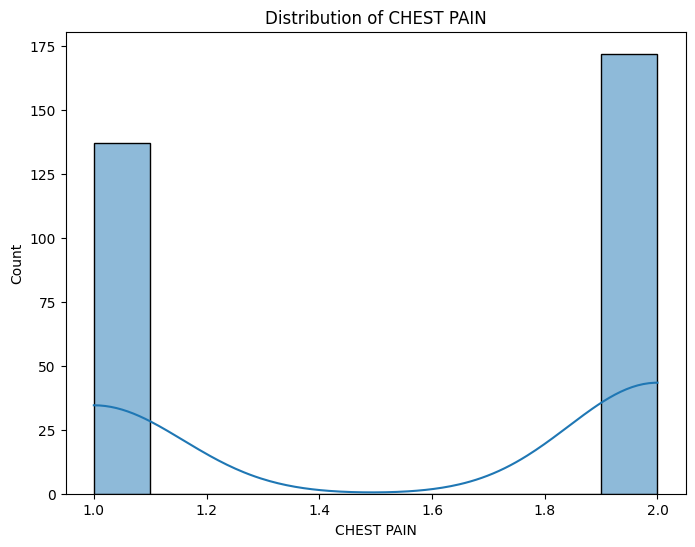

In [ ]:
for column in df.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.show()

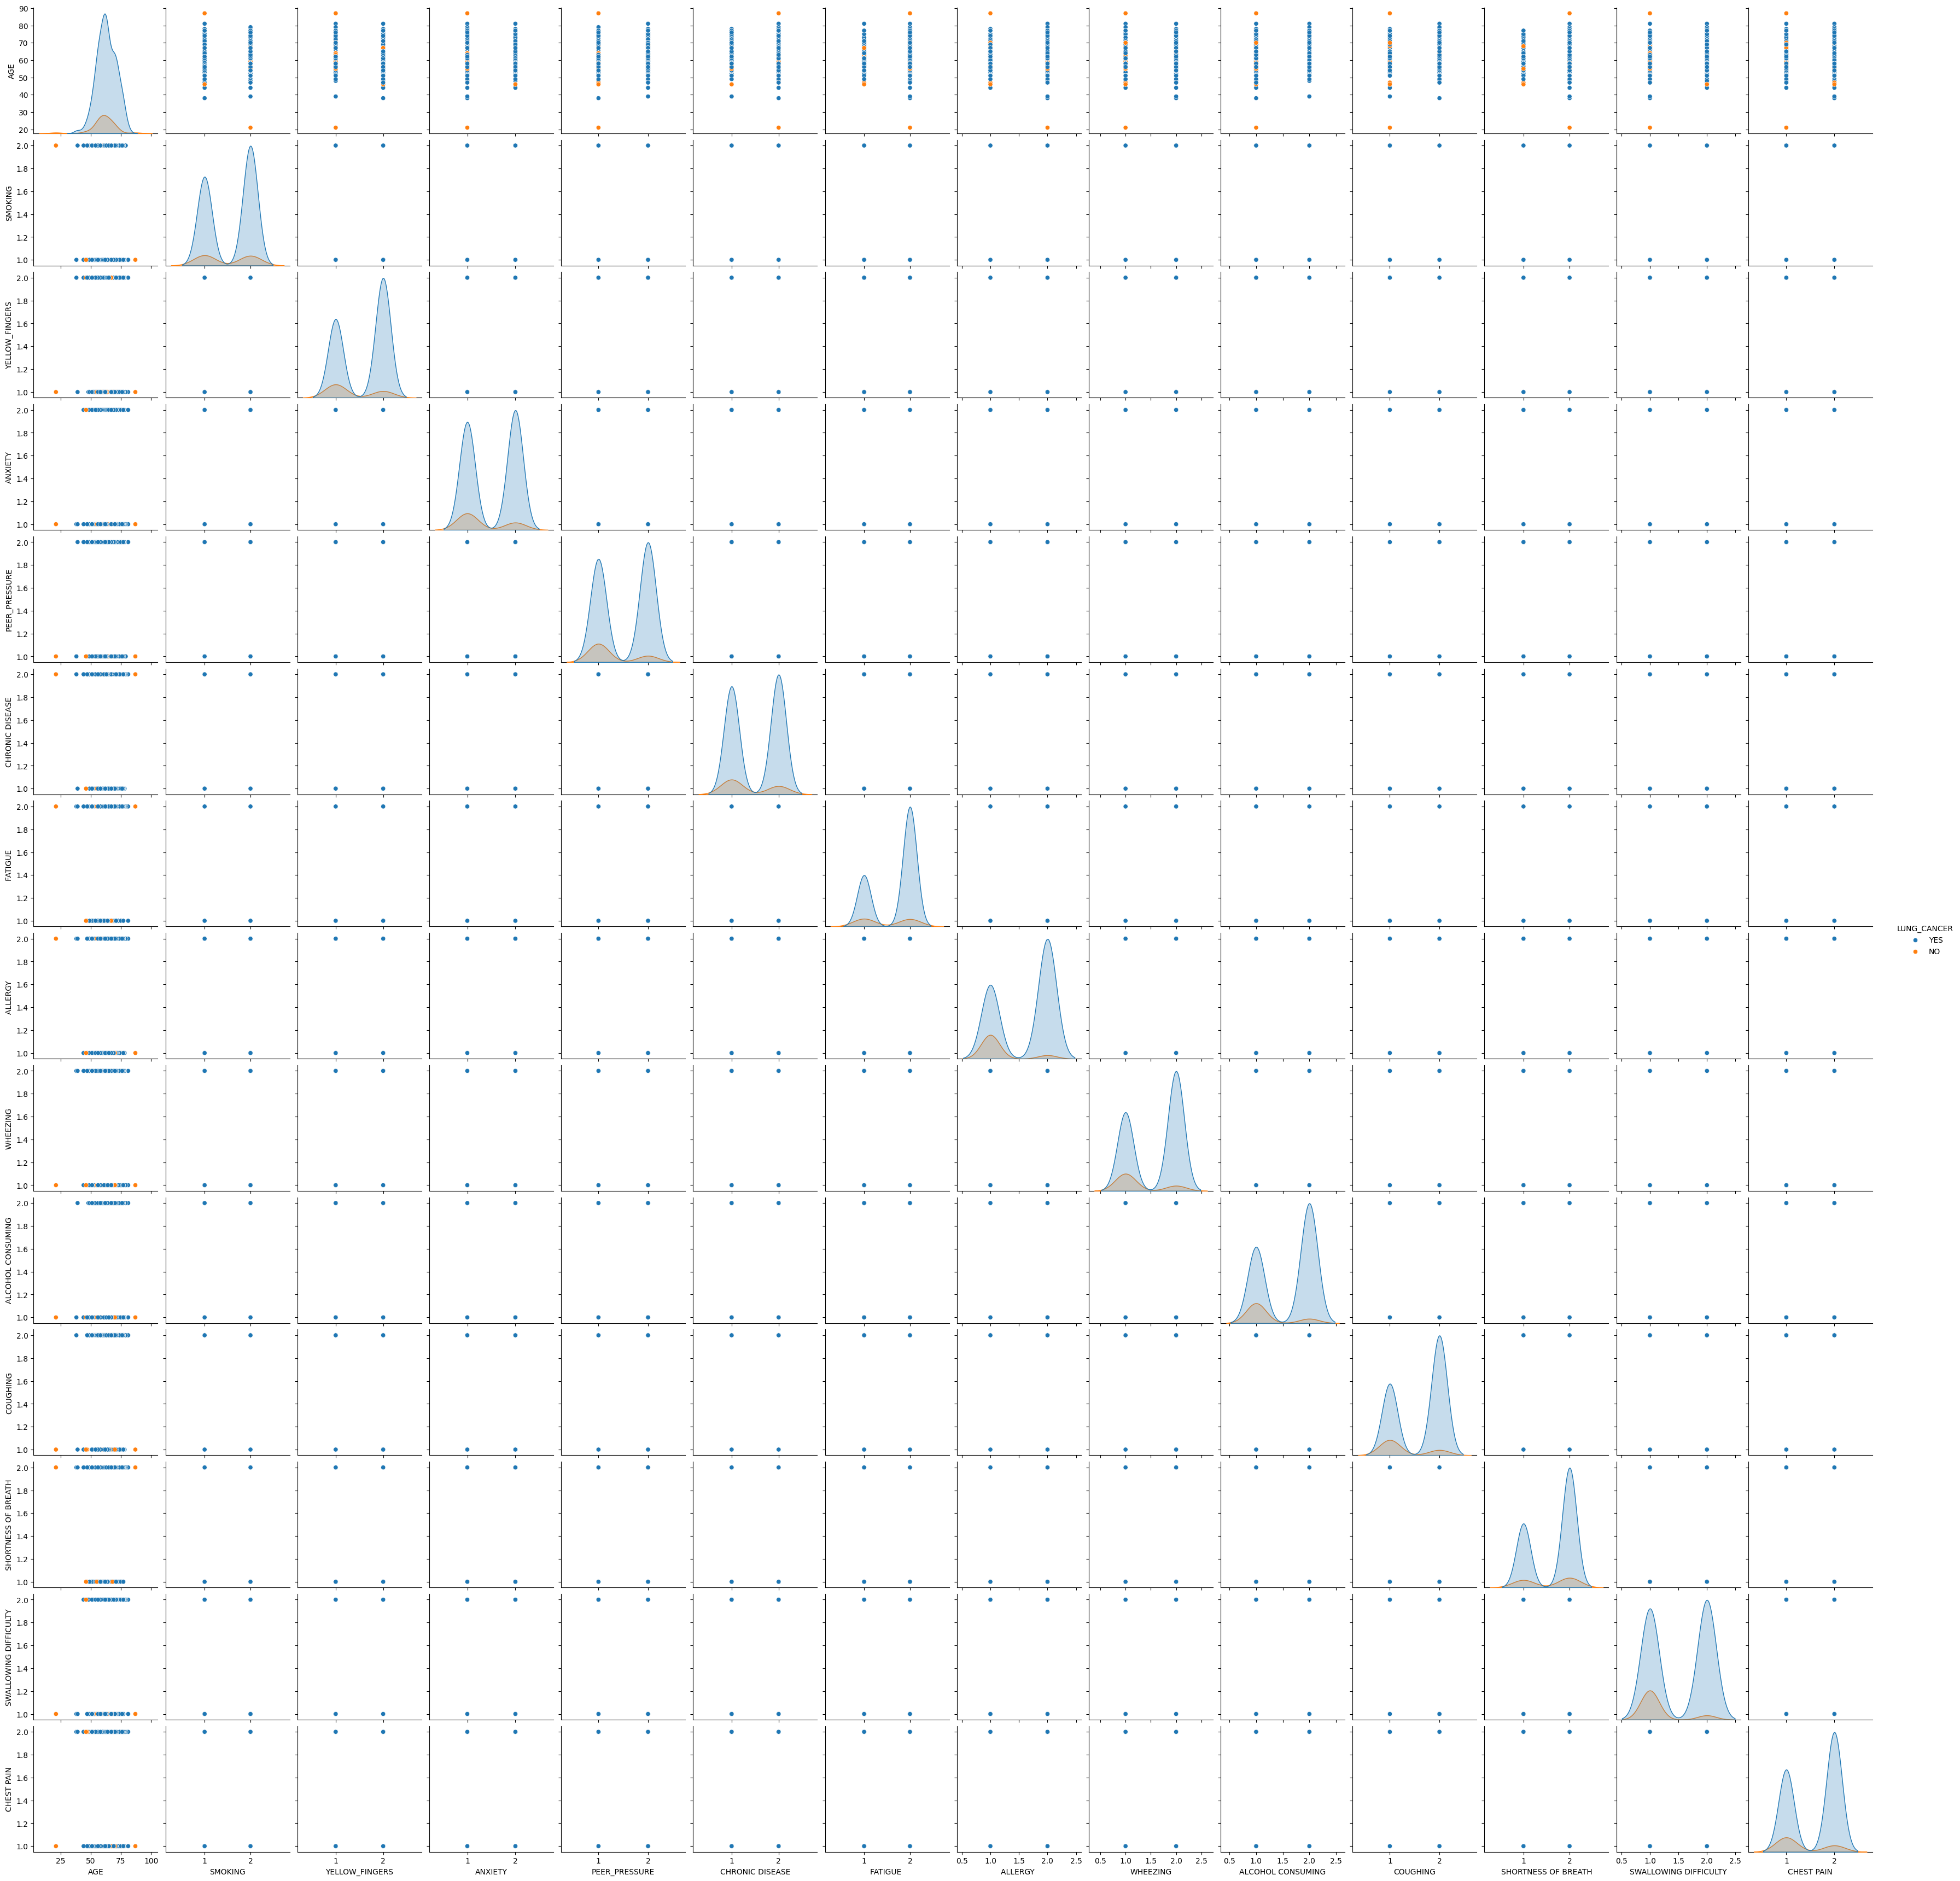

In [ ]:
sns.pairplot(df, hue='LUNG_CANCER')
plt.show()

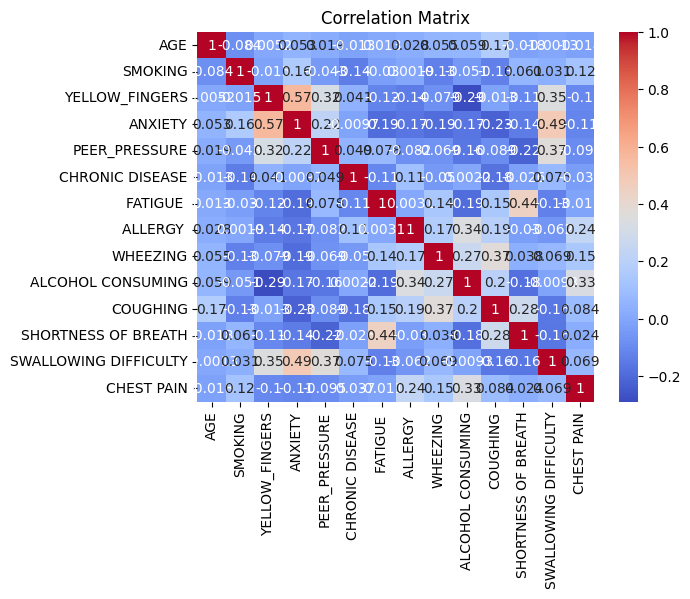

In [ ]:
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

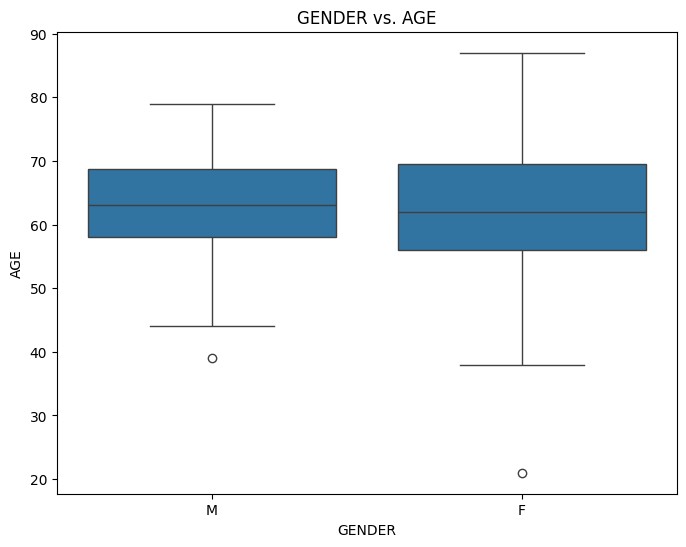

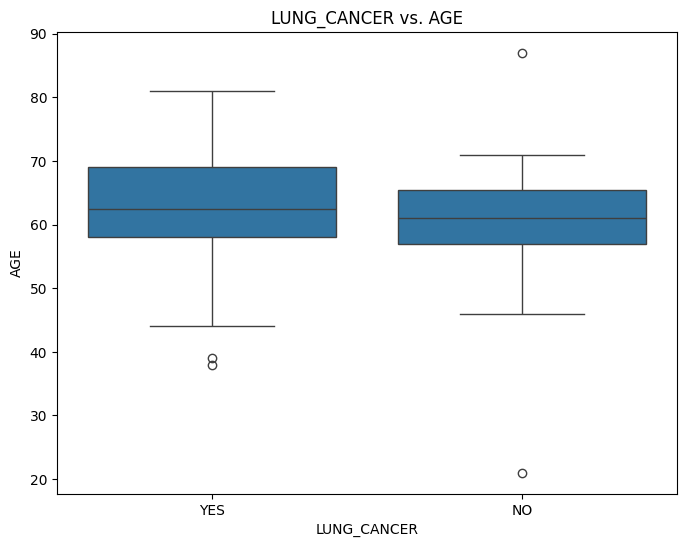

In [ ]:
for column in df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=column, y='AGE', data=df)
    plt.title(f"{column} vs. AGE")
    plt.show()

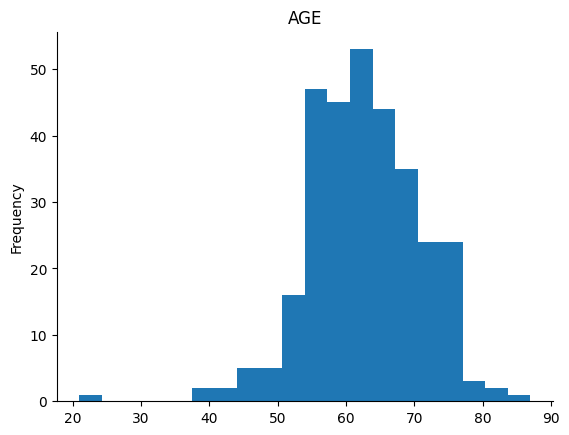

In [ ]:
df['AGE'].plot(kind='hist', bins=20, title='AGE')
plt.gca().spines[['top', 'right',]].set_visible(False)

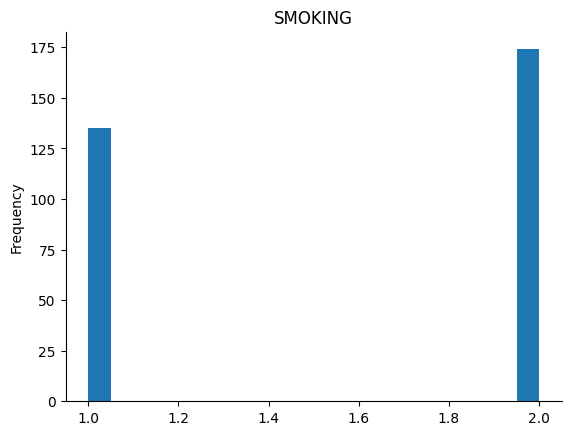

In [ ]:
df['SMOKING'].plot(kind='hist', bins=20, title='SMOKING')
plt.gca().spines[['top', 'right',]].set_visible(False)

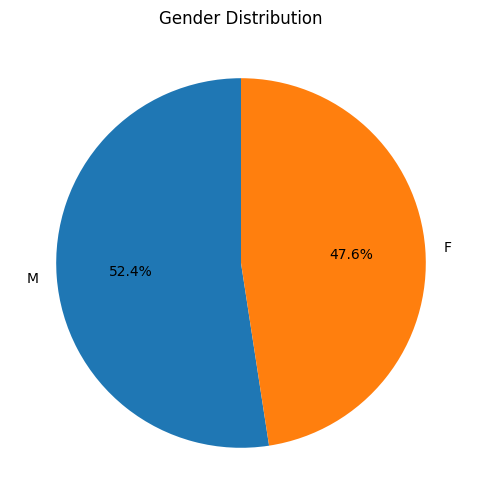

In [ ]:
gender_counts = df['GENDER'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.show()

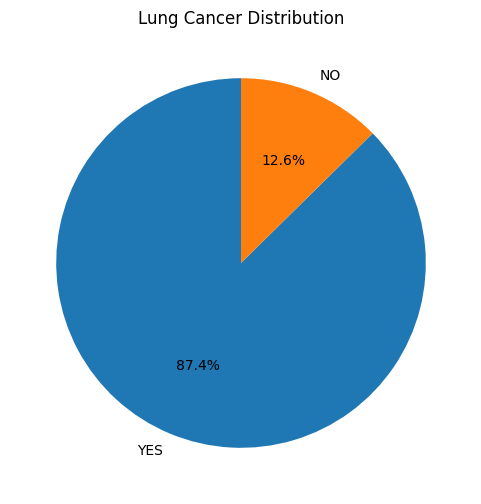

In [ ]:
cancer_counts = df['LUNG_CANCER'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(cancer_counts, labels=cancer_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Lung Cancer Distribution')
plt.show()

In [ ]:
x = df.drop(columns=['LUNG_CANCER'], axis =1 )
y = df['LUNG_CANCER']

In [ ]:
encoder = LabelEncoder()
x['GENDER'] = encoder.fit_transform(x['GENDER'])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
models = {
    'dt': DecisionTreeClassifier(random_state=42),
    'rf': RandomForestClassifier(random_state=42),
    'lg': LogisticRegression(random_state=42),
    'knn' : KNeighborsClassifier(),
    'svm' : SVC(random_state=42),
    'nb' : GaussianNB()
}

In [ ]:
name = ['dt', 'rf', 'lg', 'knn', 'svm', 'nb']

In [ ]:
accuracies = []

In [ ]:
for n in name:
    print(f'Model: {n}')
    model = models[n]
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    accuracy = model.score(x_test, y_test)*100
    accuracies.append(accuracy)
    print(classification_report(y_test, pred))
    print(confusion_matrix(y_test, pred))
    print('Accuracy: {:.2f}'.format(accuracy))
    print('*'*50)

Model: dt
              precision    recall  f1-score   support

          NO       0.50      0.50      0.50         2
         YES       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62

[[ 1  1]
 [ 1 59]]
Accuracy: 96.77
**************************************************
Model: rf
              precision    recall  f1-score   support

          NO       0.50      0.50      0.50         2
         YES       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62

[[ 1  1]
 [ 1 59]]
Accuracy: 96.77
**************************************************
Model: lg
              precision    recall  f1-score   support

          NO       1.00      0.50      0.67         2
         YES       0.98      1.00  

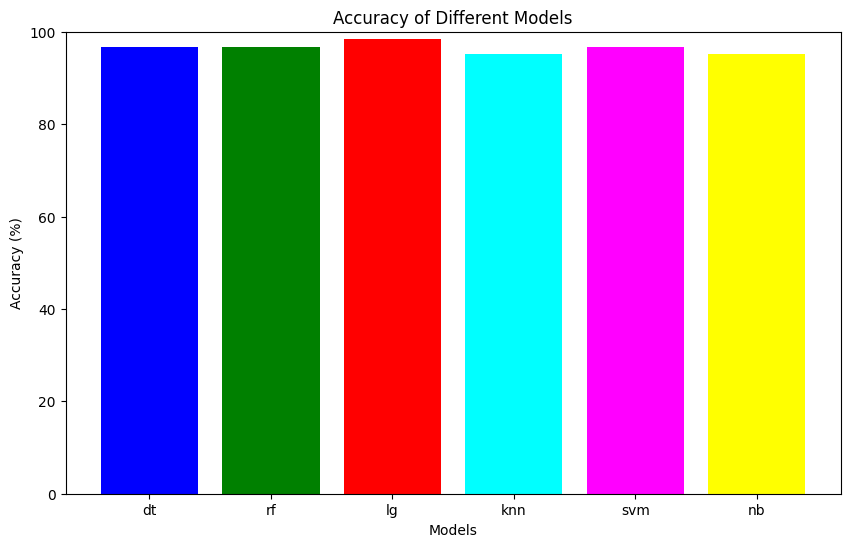

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(name, accuracies, color=['blue', 'green', 'red', 'cyan', 'magenta', 'yellow'])
plt.xlabel("Models")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy of Different Models")
plt.ylim([0, 100])
plt.show()

In [ ]:
param_grids = {
    'dt': {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 5, 10, 15],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'rf': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 5, 10, 15],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'lg': {
        'penalty': ['l1', 'l2'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100]
    },
    'knn': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    'svm': {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto', 0.1, 1]
    },
    'nb': {
        'var_smoothing': np.logspace(0,-9, num=100)
    }
}


In [ ]:
best_models = {}
for model_name, model in models.items():
  grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=5, scoring='accuracy', n_jobs=-1)
  grid_search.fit(x_train, y_train)
  best_models[model_name] = grid_search.best_estimator_



In [ ]:
model_names = list(best_models.keys())
accuracy_scores = []
for model_name, model in best_models.items():
  pred = model.predict(x_test)
  accuracy = accuracy_score(y_test, pred) * 100
  accuracy_scores.append(accuracy)
  print(f'Model: {model_name}')
  print('Accuracy: {:.2f}'.format(accuracy))
  print('*'*50)


Model: dt
Accuracy: 93.55
**************************************************
Model: rf
Accuracy: 96.77
**************************************************
Model: lg
Accuracy: 98.39
**************************************************
Model: knn
Accuracy: 93.55
**************************************************
Model: svm
Accuracy: 96.77
**************************************************
Model: nb
Accuracy: 96.77
**************************************************


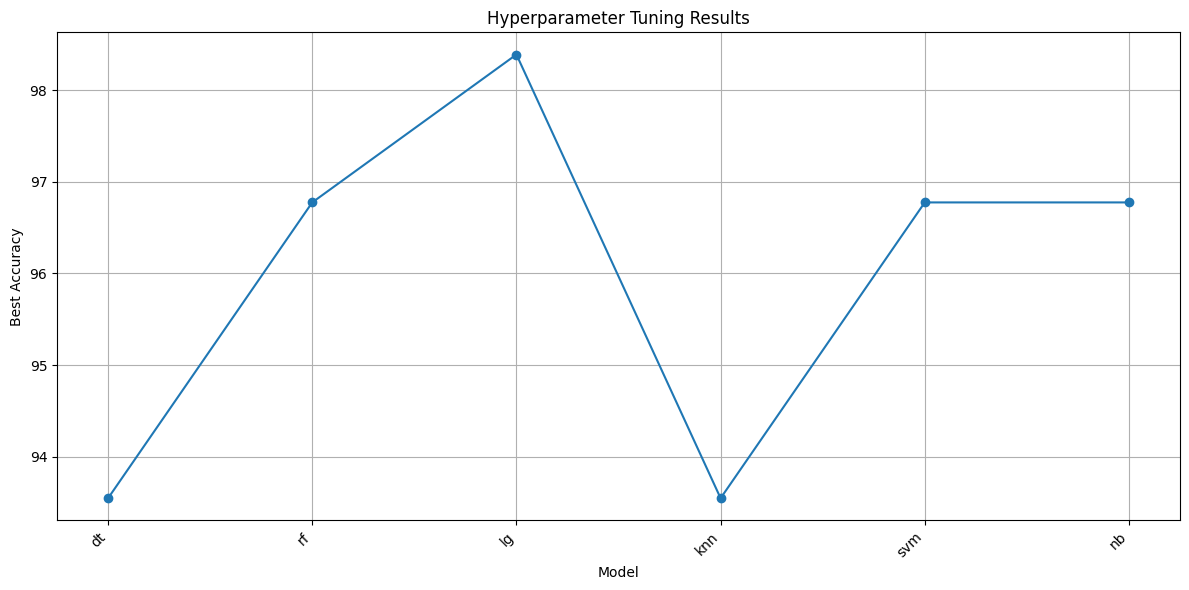

In [ ]:

plt.figure(figsize=(12, 6))
plt.plot(model_names, accuracy_scores, marker='o', linestyle='-')
plt.xlabel("Model")
plt.ylabel("Best Accuracy")
plt.title("Hyperparameter Tuning Results")
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()